# Entrega 1

Importar as bibliotecas necessárias:

In [5]:
# Importar as bibliotecas necessárias
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from datetime import datetime
import scipy.stats as stats

# Configurar os gráficos para serem exibidos no notebook
%matplotlib inline


Conexão com a API:

In [6]:
# Definir uma função para obter os dados da API e processá-los
def obter_dados(ramo, simbolo, data_inicio, data_final):
    """
    Faz uma requisição à API e retorna um DataFrame com os dados processados.
    
    Parâmetros:
        ramo (str): O ramo de atuação.
        simbolo (str): O símbolo da empresa.
        data_inicio (str): Data de início no formato dd.mm.yyyy.
        data_final (str): Data final no formato dd.mm.yyyy.
        
    Retorna:
        df (DataFrame): DataFrame com as colunas 'Data' e 'Fechamento' processadas.
    """
    # Montar a URL da API
    url = 'http://localhost:3000/query'
    params = {
        'ramo': ramo,
        'simbolo': simbolo,
        'data_inicio': data_inicio,
        'data_final': data_final
    }
    
    # Fazer a requisição GET
    response = requests.get(url, params=params)
    
    if response.status_code != 200:
        print(f'Erro na requisição: {response.status_code}')
        return None
    
    # Converter a resposta em JSON
    data = response.json()
    
    # Converter para DataFrame
    df = pd.DataFrame(data)
    
    # Converter a coluna 'Data' para datetime
    df['Data'] = pd.to_datetime(df['Data'], format='%d.%m.%Y')
    
    # Converter a coluna 'Fechamento' para float
    df['Fechamento'] = df['Fechamento'].astype(float)
    
    # Ordenar o DataFrame por data
    df = df.sort_values('Data').reset_index(drop=True)
    
    return df


Requisição de dados e armazenamento deles:

In [7]:
# Obter os dados para 'Apple_Inc.' no ramo 'Tecnologia' para um período específico
ramo = 'Tecnologia'
simbolo = 'Apple_Inc.'
data_inicio = '01.01.2022'  # Data de início no formato dd.mm.yyyy
data_final = '31.12.2022'   # Data final no formato dd.mm.yyyy

# Chamar a função para obter os dados
df = obter_dados(ramo, simbolo, data_inicio, data_final)

# Verificar os primeiros registros
df.head()


,Data,Fechamento
0,2022-01-03,179.27
1,2022-01-04,177.00
2,2022-01-05,172.29
3,2022-01-06,169.41
4,2022-01-07,169.58


Calculo da média, quartis, distância interquartil, moda, variância e desvio padrão:

In [8]:
# Verificar se o DataFrame não está vazio
if df is not None and not df.empty:
    # Cálculo da média
    media = df['Fechamento'].mean()
    
    # Cálculo dos quartis
    quartis = df['Fechamento'].quantile([0.25, 0.5, 0.75])
    
    # Distância interquartil
    iqr = quartis[0.75] - quartis[0.25]
    
    # Cálculo da moda
    moda = df['Fechamento'].mode()
    
    # Variância
    variancia = df['Fechamento'].var()
    
    # Desvio padrão
    desvio_padrao = df['Fechamento'].std()
    
    # Exibir os resultados
    print(f"Média: {media:.2f}")
    print(f"Quartis:\n{quartis}")
    print(f"Distância Interquartil (IQR): {iqr:.2f}")
    print(f"Moda: {moda.values}")
    print(f"Variância: {variancia:.2f}")
    print(f"Desvio Padrão: {desvio_padrao:.2f}")
else:
    print("O DataFrame está vazio ou não foi carregado corretamente.")


Média: 152.94
Quartis:
0.25    143.11
0.50    152.19
0.75    163.73
Name: Fechamento, dtype: float64
Distância Interquartil (IQR): 20.62
Moda: [134.19 139.91 145.26 146.88 147.4  148.78 152.6  163.73 166.55 169.6 ]
Variância: 161.94
Desvio Padrão: 12.73


Exibição do Boxplot e Histograma:



<Figure size 1400x600 with 0 Axes>

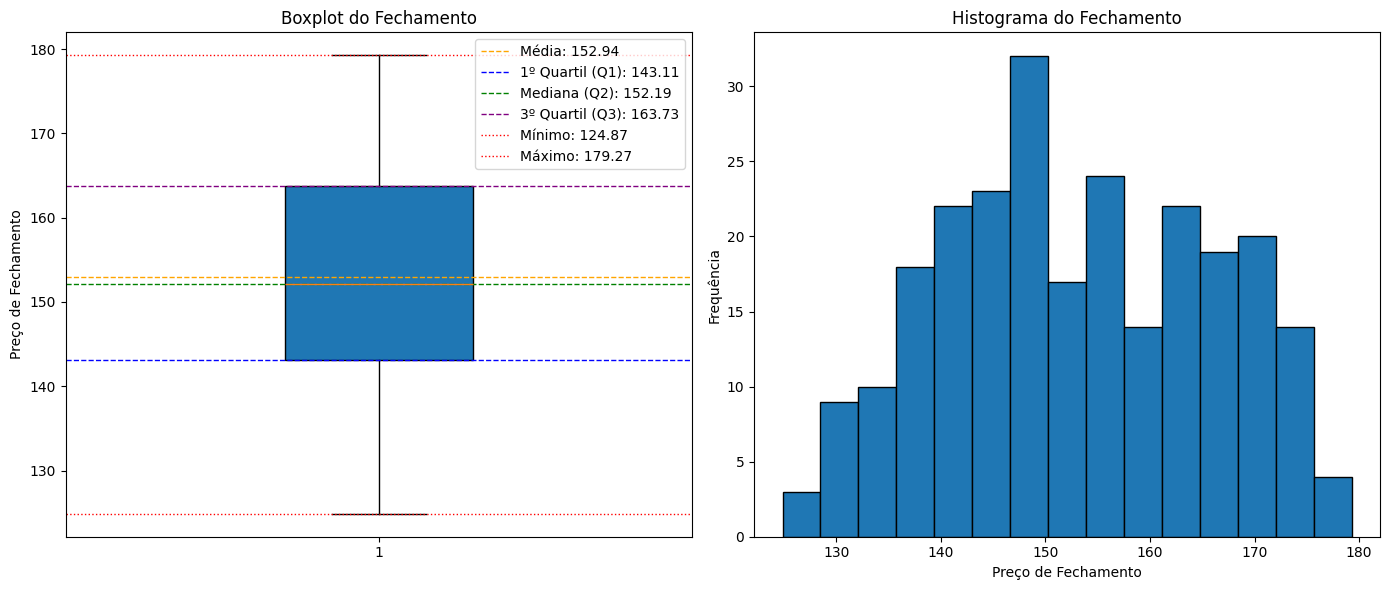

In [16]:
# Criar o boxplot e o histograma
plt.figure(figsize=(14, 6))

# Boxplot

# Valores estatisticos
minimo = df['Fechamento'].min()
maximo = df['Fechamento'].max()

# Criar o boxplot e o histograma
plt.figure(figsize=(14, 6))

# Boxplot com detalhes adicionais
plt.subplot(1, 2, 1)
boxplot = plt.boxplot(df['Fechamento'], vert=True, patch_artist=True, widths=0.3)
plt.title('Boxplot do Fechamento')
plt.ylabel('Preço de Fechamento')

# Adicionar média, quartis e valores extremos
plt.axhline(media, color='orange', linestyle='--', linewidth=1, label=f'Média: {media:.2f}')
plt.axhline(quartis[0.25], color='blue', linestyle='--', linewidth=1, label=f'1º Quartil (Q1): {quartis[0.25]:.2f}')
plt.axhline(quartis[0.5], color='green', linestyle='--', linewidth=1, label=f'Mediana (Q2): {quartis[0.5]:.2f}')
plt.axhline(quartis[0.75], color='purple', linestyle='--', linewidth=1, label=f'3º Quartil (Q3): {quartis[0.75]:.2f}')
plt.axhline(minimo, color='red', linestyle=':', linewidth=1, label=f'Mínimo: {minimo:.2f}')
plt.axhline(maximo, color='red', linestyle=':', linewidth=1, label=f'Máximo: {maximo:.2f}')

# Exibir legenda no boxplot
plt.legend(loc='upper right')

# Histograma

plt.subplot(1, 2, 2)
plt.hist(df['Fechamento'], bins=15, edgecolor='black')
plt.title('Histograma do Fechamento')
plt.xlabel('Preço de Fechamento')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()


# Entrega 2

Mostrar a equação de regressão e calcular o R^2

In [10]:
# Converter as datas para valores numéricos para a regressão
df['Data_Num'] = df['Data'].map(datetime.toordinal)

# Reshape dos dados para o modelo de regressão
X = df[['Data_Num']]  # Variável independente
y = df['Fechamento']  # Variável dependente

# Ajustar o modelo de regressão linear
modelo = LinearRegression()
modelo.fit(X, y)

# Obter os coeficientes de regressão
coeficiente_angular = modelo.coef_[0]
coeficiente_linear = modelo.intercept_

# Calcular o R^2
r_squared = modelo.score(X, y)

# Mostrar a equação da regressão
print(f"Equação da Regressão: Fechamento = {coeficiente_angular:.2f} * Data_Num + {coeficiente_linear:.2f}")
print(f"R^2: {r_squared:.4f}")


Equação da Regressão: Fechamento = -0.08 * Data_Num + 57569.32
R^2: 0.4125


Gráfico de dispersão com a linha de tendência:

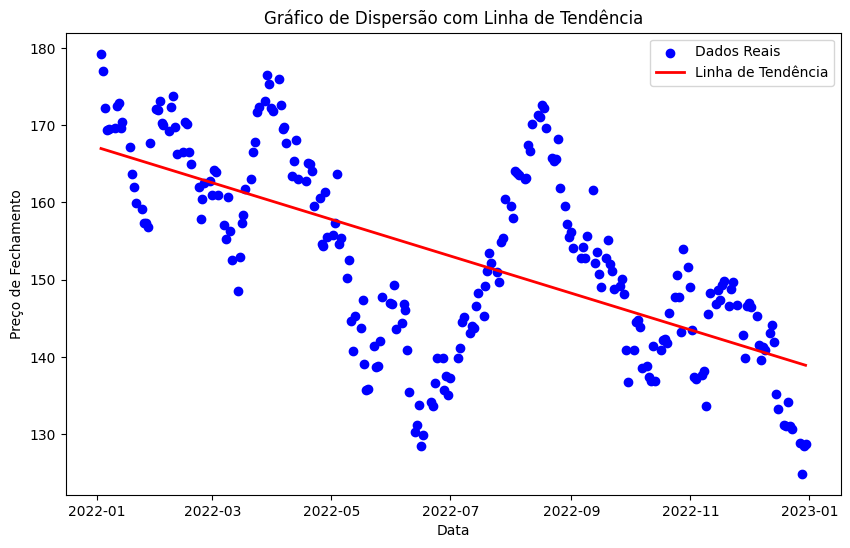

In [11]:
# Gráfico de dispersão com a linha de tendência
plt.figure(figsize=(10, 6))
plt.scatter(df['Data'], df['Fechamento'], color='blue', label='Dados Reais')

# Prever os valores usando o modelo
y_pred = modelo.predict(X)

# Plotar a linha de tendência
plt.plot(df['Data'], y_pred, color='red', linewidth=2, label='Linha de Tendência')

# Configurações do gráfico
plt.title('Gráfico de Dispersão com Linha de Tendência')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.legend()
plt.show()


# Entrega 3

In [13]:
# Definir o nível de confiança
nivel_confianca = 0.95  # 95% de confiança

# Número de observações
n = len(df)

# Média amostral
media_amostral = df['Fechamento'].mean()

# Desvio padrão amostral
desvio_padrao_amostral = df['Fechamento'].std(ddof=1)

# Erro padrão
erro_padrao = desvio_padrao_amostral / np.sqrt(n)

# Valor crítico (z) para o nível de confiança
z_critico = stats.norm.ppf(1 - (1 - nivel_confianca) / 2)

# Margem de erro (Epsilon)
epsilon = z_critico * erro_padrao

# Intervalo de confiança
limite_inferior = media_amostral - epsilon
limite_superior = media_amostral + epsilon

# Erro usando a largura do intervalo
erro_intervalo = limite_superior - limite_inferior

# Exibir os resultados
print(f"Nível de Confiança: {nivel_confianca * 100}%")
print(f"Média Amostral: {media_amostral:.2f}")
print(f"Desvio Padrão Amostral: {desvio_padrao_amostral:.2f}")
print(f"Erro Padrão: {erro_padrao:.4f}")
print(f"Valor Crítico (z): {z_critico:.4f}")
print(f"Margem de Erro (Epsilon): {epsilon:.4f}")
print(f"Intervalo de Confiança: [{limite_inferior:.2f}, {limite_superior:.2f}]")
print(f"Erro usando a largura do intervalo: {erro_intervalo:.4f}")

Nível de Confiança: 95.0%
Média Amostral: 152.94
Desvio Padrão Amostral: 12.73
Erro Padrão: 0.8032
Valor Crítico (z): 1.9600
Margem de Erro (Epsilon): 1.5743
Intervalo de Confiança: [151.37, 154.52]
Erro usando a largura do intervalo: 3.1486


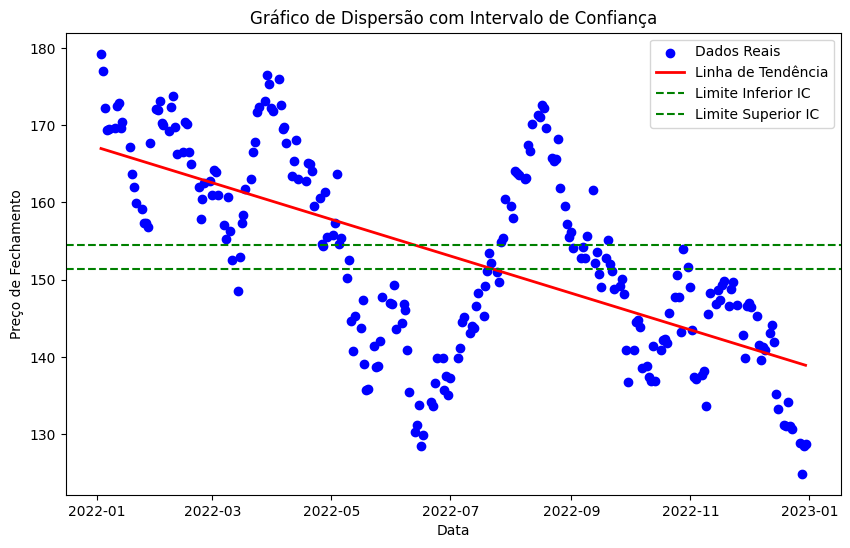

In [14]:
# Visualização do intervalo de confiança no gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(df['Data'], df['Fechamento'], color='blue', label='Dados Reais')

# Linha de tendência
plt.plot(df['Data'], y_pred, color='red', linewidth=2, label='Linha de Tendência')

# Linhas horizontais do intervalo de confiança
plt.axhline(limite_inferior, color='green', linestyle='--', label='Limite Inferior IC')
plt.axhline(limite_superior, color='green', linestyle='--', label='Limite Superior IC')

# Configurações do gráfico
plt.title('Gráfico de Dispersão com Intervalo de Confiança')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.legend()
plt.show()


In [15]:
# Criar uma nova coluna para indicar se o fechamento aumentou em relação ao dia anterior
df['Aumento'] = df['Fechamento'].diff().fillna(0)
df['Sucesso'] = df['Aumento'] > 0

# Calcular a proporção amostral (p̂)
numero_sucessos = df['Sucesso'].sum()
proporcao_amostral = numero_sucessos / n

# Definir a hipótese nula e alternativa
# H0: A proporção populacional é p0 (por exemplo, 50%)
# H1: A proporção populacional é diferente de p0
p0 = 0.5  # Proporção esperada sob a hipótese nula
nivel_significancia = 0.05  # 5%

# Calcular o erro padrão da proporção
erro_padrao_proporcao = np.sqrt((p0 * (1 - p0)) / n)

# Calcular a estatística z
z_estatistica = (proporcao_amostral - p0) / erro_padrao_proporcao

# Calcular o valor-p para um teste bilateral
valor_p = 2 * (1 - stats.norm.cdf(abs(z_estatistica)))

# Comparar o valor-p com o nível de significância
rejeitar_H0 = valor_p < nivel_significancia

# Exibir os resultados
print(f"Número de Observações (n): {n}")
print(f"Número de Sucessos: {numero_sucessos}")
print(f"Proporção Amostral (p̂): {proporcao_amostral:.4f}")
print(f"Erro Padrão da Proporção: {erro_padrao_proporcao:.4f}")
print(f"Estatística z: {z_estatistica:.4f}")
print(f"Valor-p: {valor_p:.4f}")
print(f"Nível de Significância: {nivel_significancia}")
if rejeitar_H0:
    print("Conclusão: Rejeitamos a hipótese nula (H0).")
else:
    print("Conclusão: Não rejeitamos a hipótese nula (H0).")


Número de Observações (n): 251
Número de Sucessos: 117
Proporção Amostral (p̂): 0.4661
Erro Padrão da Proporção: 0.0316
Estatística z: -1.0730
Valor-p: 0.2833
Nível de Significância: 0.05
Conclusão: Não rejeitamos a hipótese nula (H0).
